# Subjectivity Classification using Machine LearningTechniques based on BBC dataset

---
The goal of this project is to create a supervised model which predicts the subjectivity of news. 

The dataset is highly imbalanced. It contains 2,225 articles from the BBC news website corresponding to stories in five topical areas from years 2004-2005. Each article is labeled with one of the following five classes: business, entertainment, politics, sport, and tech. The target classes are distribued 90-10.

The dataset was published on the website of University College Dublin and can be found under the link:
http://mlg.ucd.ie/datasets/bbc.html

#### Table of context:
#### EDA:
1.  [Preprocessing and cleaning the data](#cleaning_data)
2.  [Visualising with the Wordclouds](#wordcloud) 
3.  [Calculating polarity and subjectivity](#polarity_subjectivity)
4.  [Adding a column for length of text](#lenght)
5.  [Dale-Chall Readability Score](#dale_chall)
6.  [Plotting the pairplots and generating correlation matrix for each category](#plots)
7.  [Outline conclusions](#target)
#### Modelling part
8.  [Setting up the classes and sub-pipelines](#pipelines)
9.  [Modelling - to get the overview of the data](#model)
10.  [Oversampling the data with imblearn](#smote)
11.  [Modelling and gridsearching](#gridsearch)
12.  [Conclusions and next steps](#steps)

### Importing packages

In [11]:
#importing packages and establishing settings for storing and viewing my data
import os
import numpy as np
import pandas as pd
from pandas import set_option

set_option('display.width', 100) 
set_option('precision', 3) 

#importing packages cleaning my text
import re

#importing packages for extracting text features
from textblob import TextBlob
from textstat.textstat import textstat

#importing packages and establishing defaults for visualising my data
from scipy.misc import imread
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid');

<a id='cleaning_data'></a>

### Preprocessing and cleaning the data 

### Loading the data

In [5]:
data_folder = "../bbc"
folders = ["business","entertainment","politics","sport","tech"]

os.chdir(data_folder)

x = []
y = []

for i in folders:
    files = os.listdir(i)
    for text_file in files:
        file_path = i + "/" +text_file
        print ("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
        data = ' '.join(data)
        x.append(data)
        y.append(i)
   
data = {'news': x, 'type': y}       
df = pd.DataFrame(data)
df.to_csv('../dataset.csv', index=False)

reading file: business/001.txt
reading file: business/002.txt
reading file: business/003.txt
reading file: business/004.txt
reading file: business/005.txt
reading file: business/006.txt
reading file: business/007.txt
reading file: business/008.txt
reading file: business/009.txt
reading file: business/010.txt
reading file: business/011.txt
reading file: business/012.txt
reading file: business/013.txt
reading file: business/014.txt
reading file: business/015.txt
reading file: business/016.txt
reading file: business/017.txt
reading file: business/018.txt
reading file: business/019.txt
reading file: business/020.txt
reading file: business/021.txt
reading file: business/022.txt
reading file: business/023.txt
reading file: business/024.txt
reading file: business/025.txt
reading file: business/026.txt
reading file: business/027.txt
reading file: business/028.txt
reading file: business/029.txt
reading file: business/030.txt
reading file: business/031.txt
reading file: business/032.txt
reading 

reading file: business/324.txt
reading file: business/325.txt
reading file: business/326.txt
reading file: business/327.txt
reading file: business/328.txt
reading file: business/329.txt
reading file: business/330.txt
reading file: business/331.txt
reading file: business/332.txt
reading file: business/333.txt
reading file: business/334.txt
reading file: business/335.txt
reading file: business/336.txt
reading file: business/337.txt
reading file: business/338.txt
reading file: business/339.txt
reading file: business/340.txt
reading file: business/341.txt
reading file: business/342.txt
reading file: business/343.txt
reading file: business/344.txt
reading file: business/345.txt
reading file: business/346.txt
reading file: business/347.txt
reading file: business/348.txt
reading file: business/349.txt
reading file: business/350.txt
reading file: business/351.txt
reading file: business/352.txt
reading file: business/353.txt
reading file: business/354.txt
reading file: business/355.txt
reading 

reading file: entertainment/146.txt
reading file: entertainment/147.txt
reading file: entertainment/148.txt
reading file: entertainment/149.txt
reading file: entertainment/150.txt
reading file: entertainment/151.txt
reading file: entertainment/152.txt
reading file: entertainment/153.txt
reading file: entertainment/154.txt
reading file: entertainment/155.txt
reading file: entertainment/156.txt
reading file: entertainment/157.txt
reading file: entertainment/158.txt
reading file: entertainment/159.txt
reading file: entertainment/160.txt
reading file: entertainment/161.txt
reading file: entertainment/162.txt
reading file: entertainment/163.txt
reading file: entertainment/164.txt
reading file: entertainment/165.txt
reading file: entertainment/166.txt
reading file: entertainment/167.txt
reading file: entertainment/168.txt
reading file: entertainment/169.txt
reading file: entertainment/170.txt
reading file: entertainment/171.txt
reading file: entertainment/172.txt
reading file: entertainment/

reading file: entertainment/384.txt
reading file: entertainment/385.txt
reading file: entertainment/386.txt
reading file: politics/001.txt
reading file: politics/002.txt
reading file: politics/003.txt
reading file: politics/004.txt
reading file: politics/005.txt
reading file: politics/006.txt
reading file: politics/007.txt
reading file: politics/008.txt
reading file: politics/009.txt
reading file: politics/010.txt
reading file: politics/011.txt
reading file: politics/012.txt
reading file: politics/013.txt
reading file: politics/014.txt
reading file: politics/015.txt
reading file: politics/016.txt
reading file: politics/017.txt
reading file: politics/018.txt
reading file: politics/019.txt
reading file: politics/020.txt
reading file: politics/021.txt
reading file: politics/022.txt
reading file: politics/023.txt
reading file: politics/024.txt
reading file: politics/025.txt
reading file: politics/026.txt
reading file: politics/027.txt
reading file: politics/028.txt
reading file: politics/0

reading file: politics/368.txt
reading file: politics/369.txt
reading file: politics/370.txt
reading file: politics/371.txt
reading file: politics/372.txt
reading file: politics/373.txt
reading file: politics/374.txt
reading file: politics/375.txt
reading file: politics/376.txt
reading file: politics/377.txt
reading file: politics/378.txt
reading file: politics/379.txt
reading file: politics/380.txt
reading file: politics/381.txt
reading file: politics/382.txt
reading file: politics/383.txt
reading file: politics/384.txt
reading file: politics/385.txt
reading file: politics/386.txt
reading file: politics/387.txt
reading file: politics/388.txt
reading file: politics/389.txt
reading file: politics/390.txt
reading file: politics/391.txt
reading file: politics/392.txt
reading file: politics/393.txt
reading file: politics/394.txt
reading file: politics/395.txt
reading file: politics/396.txt
reading file: politics/397.txt
reading file: politics/398.txt
reading file: politics/399.txt
reading 

reading file: sport/312.txt
reading file: sport/313.txt
reading file: sport/314.txt
reading file: sport/315.txt
reading file: sport/316.txt
reading file: sport/317.txt
reading file: sport/318.txt
reading file: sport/319.txt
reading file: sport/320.txt
reading file: sport/321.txt
reading file: sport/322.txt
reading file: sport/323.txt
reading file: sport/324.txt
reading file: sport/325.txt
reading file: sport/326.txt
reading file: sport/327.txt
reading file: sport/328.txt
reading file: sport/329.txt
reading file: sport/330.txt
reading file: sport/331.txt
reading file: sport/332.txt
reading file: sport/333.txt
reading file: sport/334.txt
reading file: sport/335.txt
reading file: sport/336.txt
reading file: sport/337.txt
reading file: sport/338.txt
reading file: sport/339.txt
reading file: sport/340.txt
reading file: sport/341.txt
reading file: sport/342.txt
reading file: sport/343.txt
reading file: sport/344.txt
reading file: sport/345.txt
reading file: sport/346.txt
reading file: sport/

reading file: tech/191.txt
reading file: tech/192.txt
reading file: tech/193.txt
reading file: tech/194.txt
reading file: tech/195.txt
reading file: tech/196.txt
reading file: tech/197.txt
reading file: tech/198.txt
reading file: tech/199.txt
reading file: tech/200.txt
reading file: tech/201.txt
reading file: tech/202.txt
reading file: tech/203.txt
reading file: tech/204.txt
reading file: tech/205.txt
reading file: tech/206.txt
reading file: tech/207.txt
reading file: tech/208.txt
reading file: tech/209.txt
reading file: tech/210.txt
reading file: tech/211.txt
reading file: tech/212.txt
reading file: tech/213.txt
reading file: tech/214.txt
reading file: tech/215.txt
reading file: tech/216.txt
reading file: tech/217.txt
reading file: tech/218.txt
reading file: tech/219.txt
reading file: tech/220.txt
reading file: tech/221.txt
reading file: tech/222.txt
reading file: tech/223.txt
reading file: tech/224.txt
reading file: tech/225.txt
reading file: tech/226.txt
reading file: tech/227.txt
r

### Loading the dataset

In [48]:
import pandas as pd
df = pd.read_csv('../dataset.csv', encoding='iso8859_16')

### Overview of the dataset

In [49]:
#inspecting a sample of 5 observations from the dataset
df.sample(5)

,news,type
1984,When technology gets personal\r\n \r\n In 2020...,tech
769,Singer Christina Aguilera to wed\r\n \r\n Pop ...,entertainment
86,Worldcom boss 'left books alone'\r\n \r\n Form...,business
1634,"Scotland v Italy (Sat)\r\n \r\n Murrayfield, E...",sport
1690,Ireland v USA (Sat)\r\n \r\n Saturday 20 Novem...,sport


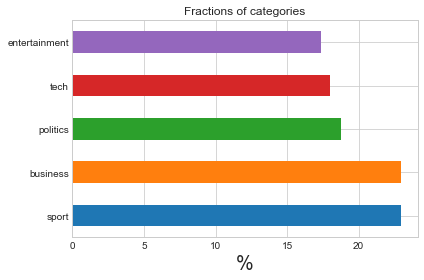

In [50]:
#let's see how many categories we have
import matplotlib.pyplot as plt
#sns.set(font_scale=1.5)
df['type'].value_counts(normalize = True).plot(kind = 'barh')
plt.xlabel("%",fontsize=20)
plt.xticks(np.arange(0.00,0.25,0.05),(np.arange(0,25,5)).astype(int))
plt.title("Fractions of categories")
plt.tight_layout()
plt.show()

### Example:

In [51]:
df[df['type']=='politics'].loc[898, 'news']

'Hewitt decries \'career sexism\'\r\n \r\n Plans to extend paid maternity leave beyond six months should be prominent in Labour\'s election manifesto, the Trade and Industry Secretary has said.\r\n \r\n Patricia Hewitt said the cost of the proposals was being evaluated, but it was an "increasingly high priority" and a "shared goal across government". Ms Hewitt was speaking at a gender and productivity seminar organised by the Equal Opportunities Commission (EOC). Mothers can currently take up to six months\' paid leave - and six unpaid. Ms Hewitt told the seminar: "Clearly, one of the things we need to do in the future is to extend the period of payment for maternity leave beyond the first six months into the second six months. "We are looking at how quickly we can do that, because obviously there are cost implications because the taxpayer reimburses the employers for the cost of that."\r\n \r\n Ms Hewitt also announced a new drive to help women who want to work in male dominated secto

### Cleaning the data

Text data is messy and ‘unstructured’ and requires quite a lot of cleaning before any machine learning or analysis can be applied to it. I tokenized each sentence into a list of words, removing punctuations, new line characters and unnecessary characters altogether, replacing upper letters with lower.

In [52]:
def clean_str(string):
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [53]:
#applying function to our columns with the news
df['cleaned_news_total'] = df['news'].apply(clean_str)

In [12]:
#checking if the cleaning process was successfull. I printed one article for the category: Politics
df[df['type']=='politics'].loc[899, 'cleaned_news_total']

'labour chooses manchester the labour party will hold its autumn conference in manchester and not blackpool it has been confirmed the much trailed decision was ratified by labour ruling national executive committee in a break with the traditional choice of a seaside venue it will be the first time since that the party has chosen manchester to host the annual event blackpool will get the much smaller february spring conference instead in what will be seen as a placatory move for years the main political parties have rotated between blackpool bournemouth and brighton and the news the much larger annual conference is not to gather in blackpool will be seen as a blow in the coastal resort in the party said it would not return to blackpool but did so in the following year bournemouth hosted the event before the party signed a two year deal for brighton to host the autumn conference colin asplin blackpool hotel association said we have tried very hard to make sure they come back to blackpool

### Preparing Stopwords

Stop words are words that occur so frequently in text that they offer little value in explaining or distinguishing between different documents of text. Some example stop words are: the, as, be, about, that, from, will, all, it, by, when, do, an, only, has, for, this. At this stage I also extended the list of stopwords and decided to remove the words such as: "will", "say", "said", "mr", "also".

In [54]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['will', 'say', 'said', 'mr', 'also', 'would', 'also', 'could'])

<a id='wordcloud'></a>

### Visualising with the Wordclouds

As the next step of my EDA. I am going visualise and identify the most 
frequently used words in my text. The word clouds work in a simple way, the more a specific word appears in a textual data, the bigger and bolder it appears in the word cloud.

Below I have printed the word clouds for 5 categories: politics, business, entertainment, sport and technology.

I decided to extend a list of stop words by adding: "will", "say", "said", "mr", "also", "would", "also", "could" as they appeared in each word cloud below.

### Politics

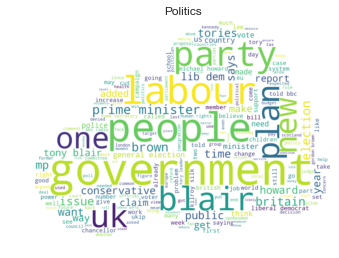

In [55]:
_mask = np.array(Image.open(('./cloud.png')))

wordcloud = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1200, 
                      mask=_mask,
                      stopwords = stop_words
).generate(' '.join(df.loc[df['type']=='politics','cleaned_news_total']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title ('Politics')
plt.axis("off")
plt.savefig('./politics_wordcloud.png', dpi=300)
plt.figure(figsize=(15,20))
plt.show()

### Business

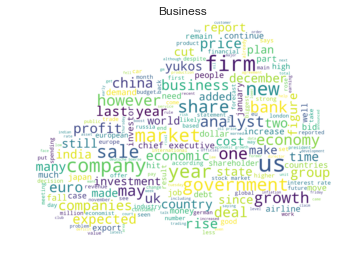

In [15]:
_mask = np.array(Image.open(('./cloud.png')))

wordcloud = WordCloud(
                      background_color='white',
                      collocations=True,
                      stopwords=stop_words,
                      mask=_mask
            ).generate(' '.join(df.loc[df['type']=='business','cleaned_news_total']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title ('Business')
plt.axis("off")
plt.savefig('./business_wordcloud.png', dpi=300)
plt.show()

### Entertainment

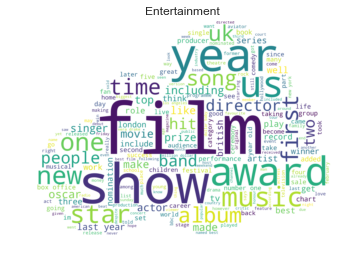

In [16]:
_mask = np.array(Image.open(('./cloud.png')))

wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2000,
                      stopwords=stop_words,
                      mask=_mask
            ).generate(' '.join(df.loc[df['type']=='entertainment','cleaned_news_total']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title ('Entertainment')
plt.axis("off")
plt.savefig('./entertainment_wordcloud.png', dpi=300)
plt.show()

### Sport

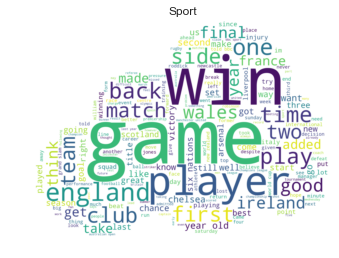

In [17]:
_mask = np.array(Image.open(('./cloud.png')))

wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2000,
                      stopwords = stop_words,
                      mask = _mask
            ).generate(' '.join(df.loc[df['type']=='sport','cleaned_news_total']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title ('Sport')
plt.axis("off")
plt.savefig('./sport_wordcloud.png', dpi=300)
plt.show()

### Technology

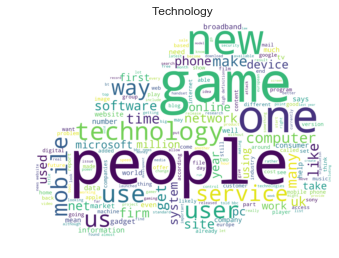

In [18]:
_mask = np.array(Image.open(('./cloud.png')))

wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2000,
                      stopwords=stop_words,
                      mask=_mask
            ).generate(' '.join(df.loc[df['type']=='tech','cleaned_news_total']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title ('Technology')
plt.axis("off")
plt.savefig('./tech_wordcloud.png', dpi=300)
plt.show()

<a id='polarity_subjectivity'></a>

### Calculating polarity and subjectivity 

The polarity score is a float within the range [-1.0, 1.0].  Polarity is a measure which gives a numerical value depending on which we can understand whether a sentence is postive or negetive.

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.



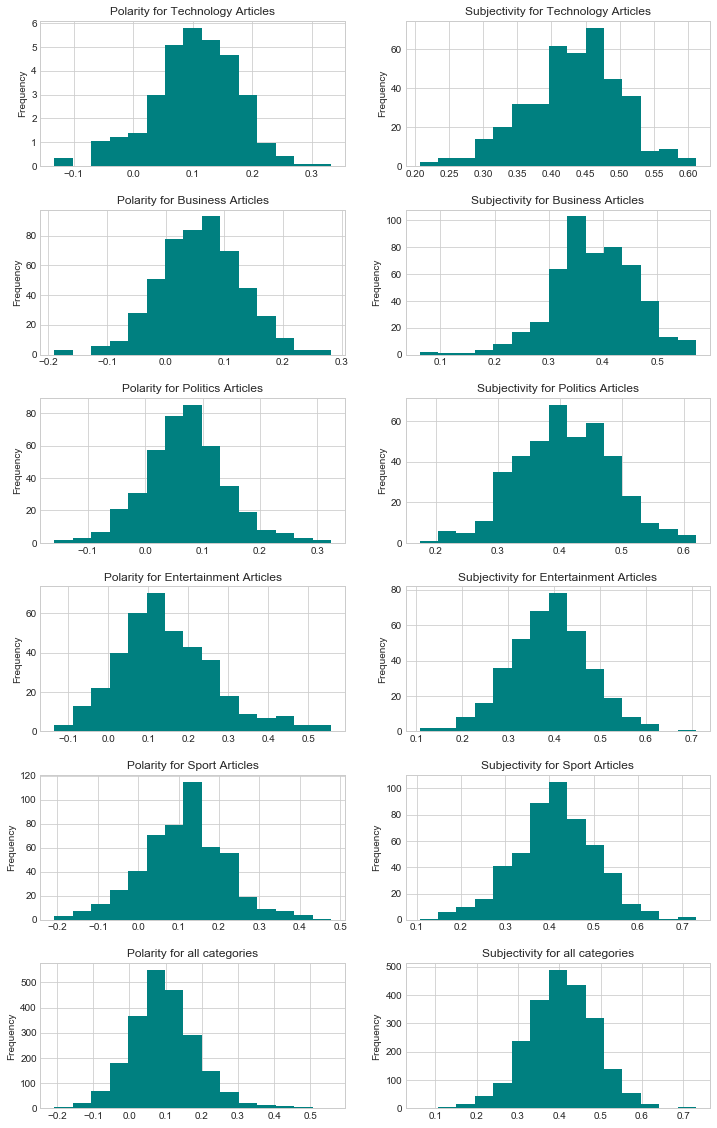

In [56]:
df['polarity'] = df['news'].str.replace('\r\n', '').apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['news'].str.replace('\r\n', '').apply(lambda x: TextBlob(x).sentiment.subjectivity)

fig,ax = plt.subplots(nrows=6,ncols=2,figsize=(12,20))
df.loc[df['type']=='tech','polarity'].plot(kind = 'hist', bins = 15, stacked=True, subplots = True, ax=ax[0, 0], color='teal', density = True)
ax[0,0].set_title('Polarity for Technology Articles')
df.loc[df['type']=='tech','subjectivity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[0, 1], color='teal')
ax[0,1].set_title('Subjectivity for Technology Articles')
df.loc[df['type']=='business','polarity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[1, 0], color='teal')
ax[1, 0].set_title('Polarity for Business Articles')
df.loc[df['type']=='business','subjectivity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[1, 1], color='teal')
ax[1, 1].set_title('Subjectivity for Business Articles')
df.loc[df['type']=='politics', 'polarity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[2, 0], color='teal')
ax[2, 0].set_title('Polarity for Politics Articles')
df.loc[df['type']=='politics','subjectivity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[2, 1], color='teal')
ax[2, 1].set_title('Subjectivity for Politics Articles')
df.loc[df['type']=='entertainment', 'polarity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[3, 0], color='teal')
ax[3, 0].set_title('Polarity for Entertainment Articles')
df.loc[df['type']=='entertainment', 'subjectivity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[3, 1], color='teal')
ax[3, 1].set_title('Subjectivity for Entertainment Articles')
df.loc[df['type']=='sport', 'polarity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[4, 0], color='teal')
ax[4, 0].set_title('Polarity for Sport Articles')
df.loc[df['type']=='sport', 'subjectivity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[4, 1], color='teal')
ax[4, 1].set_title('Subjectivity for Sport Articles')
df['polarity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[5, 0], color='teal')
ax[5,0].set_title('Polarity for all categories')
df['subjectivity'].plot(kind = 'hist', bins = 15, subplots = True, ax=ax[5, 1], color='teal')
ax[5,1].set_title('Subjectivity for all categories')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [58]:
df.groupby('type')['polarity', 'subjectivity'].describe()

polarity                                                  subjectivity         \
                 count   mean    std    min    25%    50%    75%    max        count   mean   
type                                                                                          
business         510.0  0.060  0.071 -0.190  0.011  0.060  0.104  0.282        510.0  0.383   
entertainment    386.0  0.148  0.121 -0.135  0.069  0.134  0.220  0.557        386.0  0.390   
politics         417.0  0.070  0.072 -0.158  0.026  0.069  0.112  0.324        417.0  0.408   
sport            511.0  0.113  0.105 -0.208  0.047  0.118  0.175  0.477        511.0  0.414   
tech             401.0  0.103  0.072 -0.132  0.065  0.108  0.156  0.332        401.0  0.432   

                                                         
                 std    min    25%    50%    75%    max  
type                                                     
business       0.077  0.061  0.336  0.385  0.438  0.572  
entertainment  0.088  0.107  0.330  0.392  0.448  0.709  
politics       0.076  0.173  0.353  0.408  0.462  0.620  
sport          0.092  0.106  0.361  0.417  0.474  0.732  
tech           0.070  0.206  0.389  0.438  0.477  0.612

<a id='lenght'></a>

### Calculating length of text

In [59]:
#adding a column for a lenght of text
df['text_length'] = df['news'].str.replace('\r\n', '').map(lambda x: len(x.split()))

#Generating descriptive statistics for each category
#that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.groupby('type')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
business,510.0,328.880,135.919,140.0,233.0,297.0,388.75,891.0
entertainment,386.0,330.622,261.795,143.0,225.0,262.5,360.00,3482.0
politics,417.0,453.974,300.120,89.0,317.0,439.0,529.00,4432.0
sport,511.0,329.262,187.963,114.0,204.0,288.0,409.50,1662.0
tech,401.0,502.696,239.849,162.0,338.0,447.0,629.00,2969.0


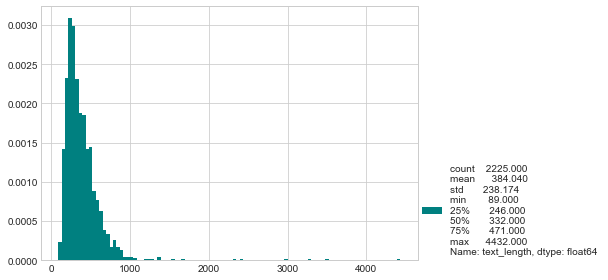

In [80]:
df.text_length.hist(bins = 100, color='teal', density = True)
#plt.yscale('log')
#plt.xscale('log')
plt.tight_layout()
plt.legend([df.text_length.describe()],loc=[1,0])# this generating descriptive statistics for whole dataset

<a id='dale_chall'></a>

### Dale-Chall Readability Score

Dale-Chall score formula is used to assess the readability level of a given text. It uses a list of 3000 commonly.The mapping of Dale-Chall score to Readability level:
- 4.9 or lower	easily understood by an average 4th-grade student or lower
- 5.0–5.9	easily understood by an average 5th or 6th-grade student
- 6.0–6.9	easily understood by an average 7th or 8th-grade student
- 7.0–7.9	easily understood by an average 9th or 10th-grade student
- 8.0–8.9	easily understood by an average 11th or 12th-grade student
- 9.0–9.9	easily understood by an average 13th to 15th-grade (college) student
- 10.0 or higher	easily understood by an average college graduate
    
Basically based on the box plots and summary statistics we can see that most of news fit into level 8.0 - 8.9. 


In [60]:
#adding a column for reading age
df['dale_chall'] = df['news'].str.replace('\r\n', '').apply(lambda x: textstat.dale_chall_readability_score(x))

In [113]:
#with describe() I can see the summmary statistics for Dale-Chall score for each category
df.groupby('type')['dale_chall'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
business,510.0,8.235,0.523,6.83,7.842,8.23,8.580,9.84
entertainment,386.0,8.028,0.612,6.46,7.610,8.01,8.420,10.09
politics,417.0,8.075,0.462,6.82,7.760,8.05,8.340,9.72
sport,511.0,7.574,0.694,6.05,7.060,7.54,8.015,10.08
tech,401.0,8.094,0.560,6.47,7.730,8.10,8.440,9.96


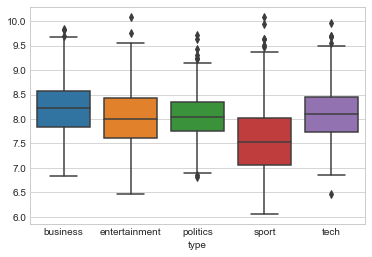

In [83]:
#printing the dale-chall readability score
sns.boxplot(x='type', y='dale_chall', data=df )
plt.ylabel('');

<a id='plots'></a>

### Plotting the pairplots and generating correlation matrix for each category

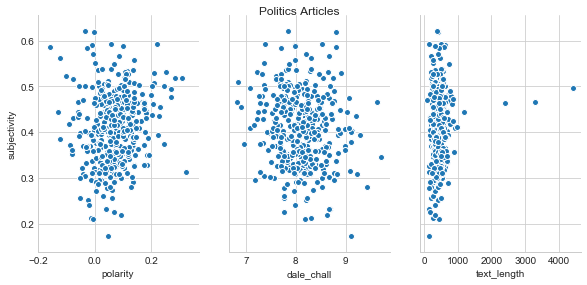

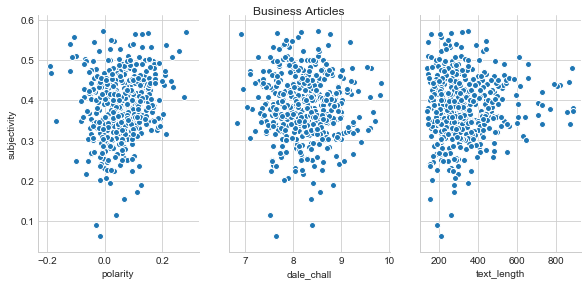

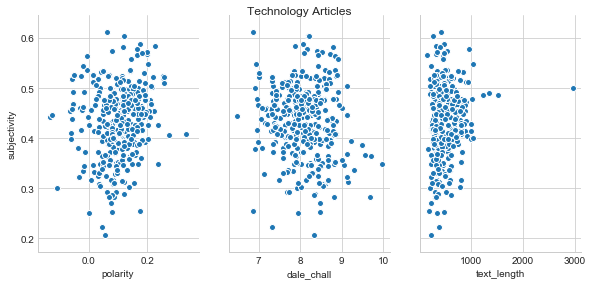

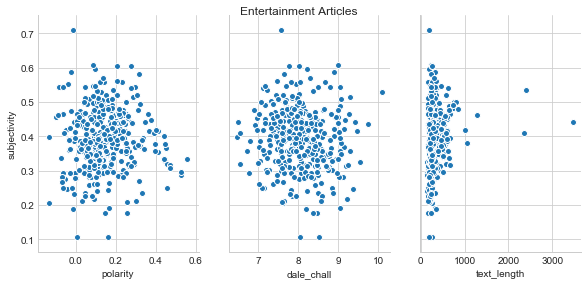

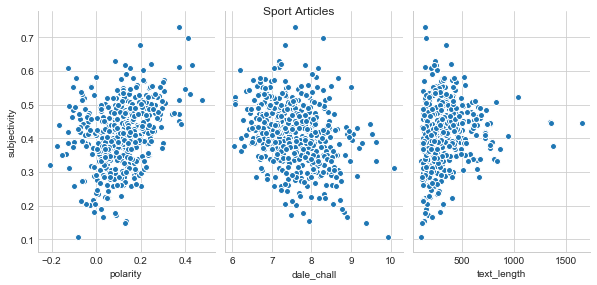

In [13]:
sns.pairplot(df.loc[df['type']=='politics'], x_vars=['polarity', 'dale_chall', 'text_length'], y_vars='subjectivity', size=4, aspect=0.7)
plt.suptitle('Politics Articles')
sns.pairplot(df.loc[df['type']=='business'], x_vars=['polarity', 'dale_chall', 'text_length'], y_vars='subjectivity', size=4, aspect=0.7);
plt.suptitle('Business Articles')
sns.pairplot(df.loc[df['type']=='tech'], x_vars=['polarity', 'dale_chall', 'text_length'], y_vars='subjectivity', size=4, aspect=0.7);
plt.suptitle('Technology Articles')
sns.pairplot(df.loc[df['type']=='entertainment'], x_vars=['polarity', 'dale_chall', 'text_length'], y_vars='subjectivity', size=4, aspect=0.7);
plt.suptitle('Entertainment Articles')
sns.pairplot(df.loc[df['type']=='sport'], x_vars=['polarity', 'dale_chall', 'text_length'], y_vars='subjectivity', size=4, aspect=0.7);
plt.suptitle('Sport Articles')
plt.tight_layout()

Based on the pairplots plotted for each category above, my first impression was that there might be a linear relationship between polarity and subjectivity for categories: Politics and Sport.  However after generating a correlation matrix I could see that correlation between them is rather small (0.177 and 0.324 respectively).

There is a slightly negative correlation between subjectivity and Dale Chall score for each category. The highest correlation is between subjectivity and text length of business news. 

Below we can find the correlation matrix which shows us the (linear) relationships between variables as measured by the Pearson correlation coefficient. A Pearson r of -1 is a perfect inverse relationship, a 1 is a perfect relationship, and a 0 is no linear relationship.

Having seen the distribution of my target, my only concern is that my target classes seem to be not distributed normally. There is a higher proportion of objective news. Let's have a look at this deeper. 

In [14]:
df.groupby('type')['subjectivity', 'polarity', 'text_length', 'dale_chall'].corr()

subjectivity  polarity  text_length  dale_chall
type                                                                       
business      subjectivity         1.000     0.154        0.065      -0.045
              polarity             0.154     1.000        0.059      -0.095
              text_length          0.065     0.059        1.000      -0.107
              dale_chall          -0.045    -0.095       -0.107       1.000
entertainment subjectivity         1.000    -0.008        0.150      -0.081
              polarity            -0.008     1.000        0.085       0.026
              text_length          0.150     0.085        1.000      -0.245
              dale_chall          -0.081     0.026       -0.245       1.000
politics      subjectivity         1.000     0.143        0.119      -0.117
              polarity             0.143     1.000        0.040      -0.082
              text_length          0.119     0.040        1.000      -0.223
              dale_chall          -0.117    -0.082       -0.223       1.000
sport         subjectivity         1.000     0.324        0.169      -0.289
              polarity             0.324     1.000        0.024      -0.202
              text_length          0.169     0.024        1.000      -0.181
              dale_chall          -0.289    -0.202       -0.181       1.000
tech          subjectivity         1.000     0.177        0.142      -0.119
              polarity             0.177     1.000        0.101      -0.102
              text_length          0.142     0.101        1.000      -0.241
              dale_chall          -0.119    -0.102       -0.241       1.000

<a id='target'></a>

### Conclusions

As we can see below, my dataset is highly imbalanced as my classes are distributed 90/10. For the purpose of this project I made an assumption that my model will be trained on only positive and negative classes, so it will lack the ability to predict a neutral class. Therefore
    - class 0 - will clasify all subjective news (when subjectivity is greater then 0.5)
    - class 1 - will classify all objective news (subjectivity is lower then 0.5)
    
In a problem where there is a large class imbalance, a model can predict the value of the majority class for all predictions and achieve a high classification accuracy.  The accuracy wil be only reflecting the underlying class distribution. I might expect that my model will be overfitted and highly biased. 

The reason we might get very high accuracy on an imbalanced data is because my models look at the data and cleverly decide that the best thing to do is to always predict Class 1 and achieve high accuracy.

In [61]:
df['subjectivity'] = df.subjectivity.map(lambda x: 0 if x>0.5 else 1 )

In [134]:
df.groupby('type').subjectivity.value_counts().unstack()#.plot(kind = 'bar')

subjectivity,0,1
type,,
business,481,29
entertainment,346,40
politics,369,48
sport,427,84
tech,338,63


In [129]:
df.subjectivity.value_counts(normalize=True)

0    0.881
1    0.119
Name: subjectivity, dtype: float64

### Saving the results to a new csv file

In [62]:
df.to_csv('dataset_2.csv', index=None)

In [1]:
# loading the data
import pandas as pd
df = pd.read_csv('./dataset_2.csv')

### Importing packages

In [2]:
from __future__ import print_function

from pprint import pprint
from time import time
import logging

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.decomposition import TruncatedSVD

#importing packages for lemming and stemmetizing
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer, SnowballStemmer

<a id='pipelines'></a>

### Setting up the classes and sub-pipelines

In [3]:
class NumericColumns(BaseEstimator,TransformerMixin):
    """Takes in df, outputs only those columns which are numeric"""

    def __init__(self):
        self.columns = None
        pass

    def get_feature_names(self):
        return list(self.columns)
    
    def transform(self, df, y=None):
        df = df.loc[:,['text_length', 
                       'polarity', 'dale_chall']]
        self.columns = df.columns
        return df 
    
    def fit(self, df, y=None):
        return self

In [4]:
def stem_lem_text(s, type='Lancaster'):
    words = s.split()
    
    if type == 'Porter':
        choice = PorterStemmer()
        reformed = [choice.stem(word) for word in words]
    elif type == 'Snowball':
        choice = SnowballStemmer('english')
        reformed = [choice.stem(word) for word in words]
    elif type == 'Lemmatize':
        choice = WordNetLemmatizer()
        reformed = [choice.lemmatize(word) for word in words]
    else:
        choice = LancasterStemmer()
        reformed = [choice.stem(word) for word in words]
        
    reformed = " ".join(reformed)
    return reformed

In [5]:
class ExtractLancaster(BaseEstimator,TransformerMixin):
    """Takes in df, outputs readability column"""

    def __init__(self, column_choice):
        self.column_choice = column_choice
        pass

    def transform(self, df, y=None):
        """Returns readability column"""
        column = df[self.column_choice].apply(stem_lem_text, type='Lancaster')
        return  column

    def fit(self, df, y=None):
        return self

In [6]:
NewsPL = Pipeline(steps = [('title',ExtractLancaster(column_choice='cleaned_news_total')),
                           ('cvec',CountVectorizer(stop_words='english')),
                           ('tfidf',TfidfTransformer()),
                          ])

In [7]:
class ToDense(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        pass
    
    def transform(self, df, y=None):
        df = df.todense()
        return df
    
    def fit(self, df, y=None):
        return self

In [8]:
pipelinemodelLR = Pipeline([
                            ('feats', FeatureUnion([
                            ('numeric', NumericColumns()), 
                            ('title', NewsPL),
                            ])),
                            ('ss', StandardScaler(with_mean=False)),
                            ('logreg', LogisticRegression(class_weight='balanced'))#for imbalanced dataset I chose class_weight='balanced'
                        ])

pipelinemodelDTC = Pipeline([
                            ('feats', FeatureUnion([
                            ('numeric', NumericColumns()), 
                            ('title', NewsPL)
                            ])),
                            ('ss', StandardScaler(with_mean=False)),
                            ('dtc', DecisionTreeClassifier(class_weight='balanced')),
                        ])

pipelinemodelNB = Pipeline([
                            ('feats', FeatureUnion([
                            ('numeric', NumericColumns()), 
                            ('titles', NewsPL)
                            ])),
                            ('ss', StandardScaler(with_mean=False)),
                            ('to_dense',ToDense()),
                            ('nb', GaussianNB()) 
                        ])
pipelinemodelRF = Pipeline([
                            ('feats', FeatureUnion([
                            ('numeric', NumericColumns()), 
                            ('title', NewsPL)
                            ])),
                            ('ss', StandardScaler(with_mean=False)),
                            ('rfc', RandomForestClassifier(class_weight='balanced'))
                        ])
pipelinemodelAB = Pipeline([
                            ('feats', FeatureUnion([
                            ('numeric', NumericColumns()), 
                            ('title', NewsPL)
                            ])),
                            ('ss', StandardScaler(with_mean=False)),
                            ('adc', AdaBoostClassifier())
                        ])

pipelinemodelBC = Pipeline([
                            ('feats', FeatureUnion([
                            ('numeric', NumericColumns()), 
                            ('title', NewsPL)
                            ])),
                            ('ss', StandardScaler(with_mean=False)),
                            ('bc', GradientBoostingClassifier())
                        ])

<a id='model'></a>

### spliting the data into train and test set

In [9]:
X = df[['cleaned_news_total', 'text_length',
       'polarity', 'dale_chall']]
y = df['subjectivity']

kfold = KFold(n_splits=4, random_state=27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27, shuffle = True)

Baseline accuracy: 87.8743%
Logistic Regression
****Results****
train time: 10.053s
test time:  4.069s
Cross validation score on the traing set: 88.3121%
Accuracy (test set): 87.8743%
ROC: 73.1108%
classification report:
             precision    recall  f1-score   support

          0       0.50      0.15      0.23        81
          1       0.89      0.98      0.93       587

avg / total       0.85      0.88      0.85       668

confusion matrix:
[[ 12  69]
 [ 12 575]]

Decision Tree Classifier
****Results****
train time: 10.489s
test time:  4.609s
Cross validation score on the traing set: 81.1198%
Accuracy (test set): 83.2335%
ROC: 63.3226%
classification report:
             precision    recall  f1-score   support

          0       0.33      0.37      0.35        81
          1       0.91      0.90      0.90       587

avg / total       0.84      0.83      0.84       668

confusion matrix:
[[ 30  51]
 [ 61 526]]

Naive Bayes
****Results****
train time: 10.711s
test time:  4.528s


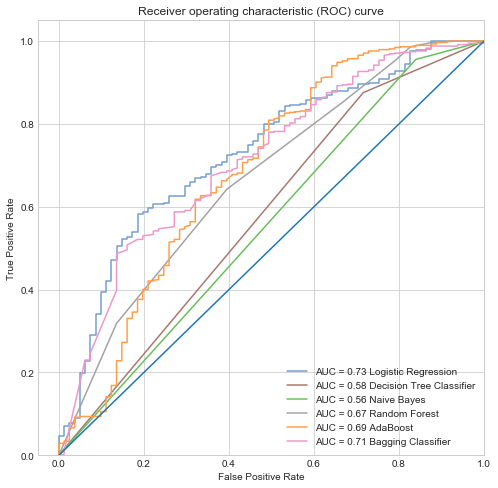

In [13]:
classifiers = [pipelinemodelLR, 
               pipelinemodelDTC, 
               pipelinemodelNB, 
               pipelinemodelRF, 
               pipelinemodelAB, 
               pipelinemodelBC
              ]

labels = ['Logistic Regression',
          'Decision Tree Classifier',
          'Naive Bayes', 
          'Random Forest',
          'AdaBoost',
          'Bagging Classifier' 
         ]

colours = ['#729ECE',
          '#A8786E', 
          '#67BF5C',
          '#A2A2A2',
          '#FF9E4A',
          '#ED97CA',
         ]

print("Baseline accuracy: {:.4%}".format(np.mean(y_test)))

for label, clf in zip(labels, classifiers):
        
    print("="*20)
    print(label)
    
    print('****Results****')
    
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    
    t0 = time()
    train_predictions = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    acc = cross_val_score(clf, X_train, y_train, cv = 10)#cv=kfold)
    print("Cross validation score on the traing set: {:.4%}".format(acc.mean()))
        
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy (test set): {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)[:, 1]
    roc = roc_auc_score(y_test, train_predictions)
    print("ROC: {:.4%}".format(roc))
    
    train_predictions = clf.predict(X_test)
    print("classification report:")
    print(classification_report(y_test, train_predictions))
    print("confusion matrix:")
    print(confusion_matrix(y_test, train_predictions))
    
    print()
    
print("="*20)


fig, ax = plt.subplots(figsize=(8, 8))

for i, clf in enumerate(classifiers):
    
    clf.fit(X_train, y_train)
    
    train_predictions = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, train_predictions)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colours[i],
    label='AUC = %0.2f' % roc_auc + " " + labels[i])

plt.plot([0, 1], [0, 1])

plt.xlim([-0.05, 1.])
plt.ylim([0, 1.05])

ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')

plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')

plt.show()

#### Conclussions

As mentioned before, building a classifier using the data as it is, would in most cases give us a prediction model that always returns the majority class. The classifier would be biased and my model would not be model useful in the problem domain.

My model scores show that my classifiers are more sensitive to detecting the majority class and less sensitive to the minority class. Thus, if I don't take care of the issue, the classification output will be biased, in many cases resulting in always predicting the majority class. 

What I should try to achieve with the F1-score metric is to find an equal balance between precision and recall, which is extremely useful in most scenarios when we are working with imbalanced datasets. 

At the moment the best performing classifier is Random Forest which has pretty good pression scores for class 1, but has also very low F1 score for class 0.  

Things to consider:

I would like to try oversampling or undersampling my data:
 - oversampling the minority class (SMOTE) 
 - undersampling the majority class (Tomek links, NearMiss)

<a id='smote'></a>

#### OK, Let see how my pipeline with Random Forest works with SMOTE()

My idea is to try to oversample only the training set and keep the original proportions on the test set. First I will apply train_test_split and oversample only my training dataset.

In [14]:
from imblearn.pipeline import make_pipeline as Pipeline_imb
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss

In [15]:
sm = SMOTE(random_state=42)

In [16]:
pipelinemodelRF = Pipeline([
                            ('feats', FeatureUnion([
                            ('numeric', NumericColumns()), 
                            ('title', NewsPL)
                            ])),
                            #('ss', StandardScaler(with_mean=False)),
                            #('rfc', RandomForestClassifier())
                        ])

In [17]:
X = pipelinemodelRF.fit_transform(X)

In [18]:
#splitting the data on training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
#fitting SMOTE on training set 
X_res, y_res = sm.fit_sample(X_train, y_train)

In [26]:
pipelinemodelRF = Pipeline([
                            #('feats', FeatureUnion([
                            #('numeric', NumericColumns()), 
                            #('title', NewsPL)
                            #]))
                            ('ss', StandardScaler(with_mean=False)),
                            ('rfc', RandomForestClassifier())
                        ])

In [21]:
pipelinemodelRF.fit(X_res, y_res)# fiting the data on ('ss', StandardScaler(with_mean=False)), ('rfc', RandomForestClassifier())

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=False, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [22]:
f1 = cross_val_score(pipelinemodelRF, X_res, y_res, cv=10, scoring='f1')
print("Cross validate F1 score on the training set: {:.4%}".format(f1.mean()))

Cross validate F1 score on the training set: 94.7310%


In [24]:
parameters = {
                    #'feats__bagwords__cvec__ngram_range': ((1,1),(1,2),(2,2)),
                    #'feats__bagwords__cvec__max_features': (5000,8000),
                    #'feats__bagwords__tfidf__norm': ('l1','l2'),
                    'rf__n_estimators': (40,50),
                    #'rf__max_features': (50,75,'auto','sqrt','log2',None),
                    #'rf__min_samples_split': (3,5,10)
}

<a id='gridsearch'></a>

### Gridsearching pipeline model 

Normally at this stage I would grid search my pipelinemodel but this process is very slow on my dataset.  It took me a couple of hours to grid search my model with range of parameters for ngrams (1,1),(1,2),(2,2). I selected different values for n_jobs starting with '-1' and then trying: '1' or '2'.

Below I placed the dictionary with parameters that I like to tune my model. For RandomForest I would specify the hyperparameters such as: 

- n_estimators“, which is just the number of trees the algorithm builds before taking the maximum voting or taking averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

- „max_features“, which is the maximum number of features Random Forest is allowed to try in an individual tree. 

- „min_sample_leaf “. This determines, like its name already says, the minimum number of leafs that are required to split an internal node.

- n_jobs“ hyperparameter tells the engine how many processors it is allowed to use. If it has a value of 1, it can only use one processor. A value of “-1” means that there is no limit.

I would also try also to gridsearch countverctorizer by setting the range of parameters for  ngrams or/and max features. I gave the example of parameters below:

        parameters = {
                        'feats__bagwords__cvec__ngram_range': ((1,1),(1,2),(2,2)),
                        'feats__bagwords__cvec__max_features': (5000,8000),
                        #'feats__bagwords__tfidf__norm': ('l1','l2'),
                        'rf__n_estimators': (40,50),
                        'rf__max_features': (50,75,'auto','sqrt','log2',None),
                        'rf__min_samples_split': (3,5,10)
                        }
        GridSearch_logreg  = GridSearchCV(sc, pipelinemodelRF, parameters, cv=4, n_jobs=2, verbose=1) #try with N_obs = -1
        GridSearch_logreg.fit(X_train,y_train)
        RFGridSearch.best_params_

In [23]:
# my scores on the test set
train_predictions = pipelinemodelRF.predict(X_test)
f1 = f1_score(y_test, train_predictions)
print("F1 score on test set: {:.4%}".format(f1))
    
train_predictions = pipelinemodelRF.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, train_predictions)
print("ROC: {:.4%}".format(roc))
    
train_predictions = pipelinemodelRF.predict(X_test)
print("classification report:")
print(classification_report(y_test, train_predictions))

print("confusion matrix:")
print(confusion_matrix(y_test, train_predictions))

F1 score on test set: 93.1148%
ROC: 68.8805%
classification report:
             precision    recall  f1-score   support

          0       0.34      0.23      0.28        69
          1       0.91      0.95      0.93       599

avg / total       0.86      0.87      0.86       668

confusion matrix:
[[ 16  53]
 [ 31 568]]


### Conclusions 

In this case oversampling data did not help too much. Although the results are almost identical, it can be seen that the resampling allowed to correct the poor recall of the class 0 at the cost of reducing the other metrics for the other classes. Also oversampling training test improved my ROC score on test set(1.65%). However, the overall results are slightly better.

<a id='steps'></a>

### Things to consider

1) Try different undersampling and oversampling inblearn techniques

2) Try to speed up gridsearching of my model. My data is 10Mb, text data usually is very sparse. My gridsearching process is very slow. Even if I increased the model speed by setting n_jobs = -1 it was still slow.

I would like to try PySpark and create a cluster on EC2 to see if I can speed up my gridsearch. Or investigate Sklearn - Spark 

3) I would be nice to create Flask app, to see how my model works on data